---
# Written by Usama Azhar.
# usamaazhar261@gmail.com
---
### Performing the Task 1: Dataset Selection and Exploration
- Search for a time series dataset with a continuous target variable from reputable sources (e.g., 
Kaggle, UCI Machine Learning Repository, government databases).
- The dataset should have at least 1000 data points and multiple features.
- The target variable should be `continuous`.
- Perform initial `Exploratory Data Analysis`, including `summary statistics` and `data visualizations`.

In [ ]:
# Importing the Main Libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [26]:
# Downloading the market data from Yahoo! Finance'Api 
df = yf.download('TSLA', start='2010-06-29', end='2023-12-31')

[*********************100%***********************]  1 of 1 completed


In [27]:
# Checking the dataset
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [28]:
# The Current dataset column names are Tuples 
print('Original columns:' , df.columns)

# Creating a new list of names by taking the first item(Only Choosing Close, High, Low...)          # If this command were to play multiple times the result would show the index of 0 like only (C,H,L,O,V)  
new_column_names = [col[0] for col in df.columns]

# Assign the new clean list of names to my dataframe
df.columns = new_column_names

# Checking the result
print('\nNew Columns:', df.columns)

Original columns: MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

New Columns: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [29]:
# Checking the dataset again
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [30]:
# Here, I naming the column names by using dictionary method
# Creating the dictionary for changing column names
renamed_dict = {
    'Close': 'Closing Price',
    'High': 'Daily High',
    'Low': 'Daily Low',
    'Open': 'Daily Open',
    'Volume': 'Volume'
}

df_renamed_columns = df.rename(columns=renamed_dict)            # Assign the new columns to my dataframe

print(df_renamed_columns.head())            #Here, checking the result

            Closing Price  Daily High  Daily Low  Daily Open     Volume
Date                                                                   
2010-06-29       1.592667    1.666667   1.169333    1.266667  281494500
2010-06-30       1.588667    2.028000   1.553333    1.719333  257806500
2010-07-01       1.464000    1.728000   1.351333    1.666667  123282000
2010-07-02       1.280000    1.540000   1.247333    1.533333   77097000
2010-07-06       1.074000    1.333333   1.055333    1.333333  103003500


In [31]:
# Successfully done renaming the columns
df_renamed_columns.head()

,Closing Price,Daily High,Daily Low,Daily Open,Volume
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [32]:
# Saving the Dataset to csv file 
# Reseting the index, So i can preserve the Date Column
df_with_date_column = df_renamed_columns.reset_index()

# cross verifying
print("DataFrame after resetting index:")
print(df_with_date_column.head())

# Saving the dataset 
file_name = 'Stock_Data.csv'
df_with_date_column.to_csv(file_name, index=False)

DataFrame after resetting index:
        Date  Closing Price  Daily High  Daily Low  Daily Open     Volume
0 2010-06-29       1.592667    1.666667   1.169333    1.266667  281494500
1 2010-06-30       1.588667    2.028000   1.553333    1.719333  257806500
2 2010-07-01       1.464000    1.728000   1.351333    1.666667  123282000
3 2010-07-02       1.280000    1.540000   1.247333    1.533333   77097000
4 2010-07-06       1.074000    1.333333   1.055333    1.333333  103003500


In [33]:
# Fetching our dataset using the pandas library
Data = pd.read_csv('Stock_Data.csv')
Data.head()

,Date,Closing Price,Daily High,Daily Low,Daily Open,Volume
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [34]:
Data.tail()

,Date,Closing Price,Daily High,Daily Low,Daily Open,Volume
3395,2023-12-22,252.539993,258.220001,251.369995,256.760010,93249800
3396,2023-12-26,256.609985,257.970001,252.910004,254.490005,86892400
3397,2023-12-27,261.440002,263.339996,257.519989,258.350006,106494400
3398,2023-12-28,253.179993,265.130005,252.710007,263.660004,113619900
3399,2023-12-29,248.479996,255.190002,247.429993,255.100006,100615300


In [35]:
# this pandas function provides the consice summary of the dataframe
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3400 non-null   object 
 1   Closing Price  3400 non-null   float64
 2   Daily High     3400 non-null   float64
 3   Daily Low      3400 non-null   float64
 4   Daily Open     3400 non-null   float64
 5   Volume         3400 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 159.5+ KB


In [36]:
# Providing the Summary Statistics or descriptive statistics for our numerical columns 
Data.describe()

,Closing Price,Daily High,Daily Low,Daily Open,Volume
count,3400.000000,3400.000000,3400.000000,3400.000000,3.400000e+03
mean,70.474242,72.048393,68.819973,70.493993,9.681167e+07
std,101.480831,103.824949,99.066386,101.559061,8.004848e+07
min,1.053333,1.108667,0.998667,1.076000,1.777500e+06
25%,10.779833,11.014167,10.417333,10.722500,4.598775e+07
50%,16.928666,17.218667,16.679334,16.944000,8.122500e+07
75%,108.349998,111.962500,104.220999,109.584000,1.235249e+08
max,409.970001,414.496674,405.666656,411.470001,9.140820e+08


In [37]:
# Checking the dataframe's dimensionality
# How many rows and Columns
Data.shape

(3400, 6)

In [38]:
Data.columns

Index(['Date', 'Closing Price', 'Daily High', 'Daily Low', 'Daily Open',
       'Volume'],
      dtype='object')

In [39]:
# Our dataframe's columns data types
Data.dtypes

Date              object
Closing Price    float64
Daily High       float64
Daily Low        float64
Daily Open       float64
Volume             int64
dtype: object

In [40]:
# Date Column dtype is Object
# I convert it Datetime 'to Calender Dates'

Data['Date'] = pd.to_datetime(Data['Date'], errors='coerce')            # Here, I select the only column in our dataframe and use the pandas.to_ function 
# Errors coerce means if it were not able to convert into Date, it will put a NaN but in our case Nat(Not a time) value

In [41]:
# Checking Here
Data.info()
# WE can see, the 'Date' column's datatype has been successfully converted to datetime64[ns]. (ns=nanoseconds)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3400 non-null   datetime64[ns]
 1   Closing Price  3400 non-null   float64       
 2   Daily High     3400 non-null   float64       
 3   Daily Low      3400 non-null   float64       
 4   Daily Open     3400 non-null   float64       
 5   Volume         3400 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 159.5 KB


In [42]:
# There are no missing/null values in our dataset
Data.isnull().sum()

Date             0
Closing Price    0
Daily High       0
Daily Low        0
Daily Open       0
Volume           0
dtype: int64

In [43]:
# Creating the Target Variable. Why? It's to make things easiear what if I were to change my Continous Variable, then i just have to change the value. 
# Choosing my Target Variable(Continous Variable). Continous VAriable means numeric value
target_variable = 'Closing Price'

In [44]:
# Checking if the Target Variable exists or not 
# target_variable is 'Closing Price' column
target_variable in Data.columns

True

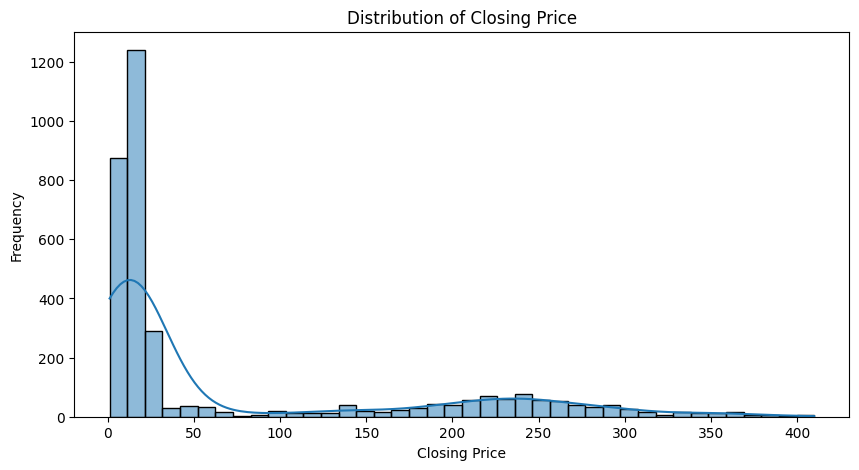

In [45]:
# Creating the Histogram to present some visuals and learn through it.
# Histogram of the target variable.
# This shows us how often different price ranges appear.
plt.figure(figsize=(10, 5))
sns.histplot(Data[target_variable], kde=True, bins=40)                  # kde=True means adding a smooth line, bins is the range of numerical values 
plt.title('Distribution of Closing Price')                              # Set the title of the plot to clearly describe its content
plt.xlabel('Closing Price')                                             # Label the x-axis to indicate it represents the 'Closing Price'
plt.ylabel('Frequency')                                                 # Here Frequency represent how man times the closing price fell within a particular price range(bins)
plt.savefig('distribution_histogram.png', dpi=300, bbox_inches='tight', facecolor='lightgray')
plt.show()                                                              # Show the plot

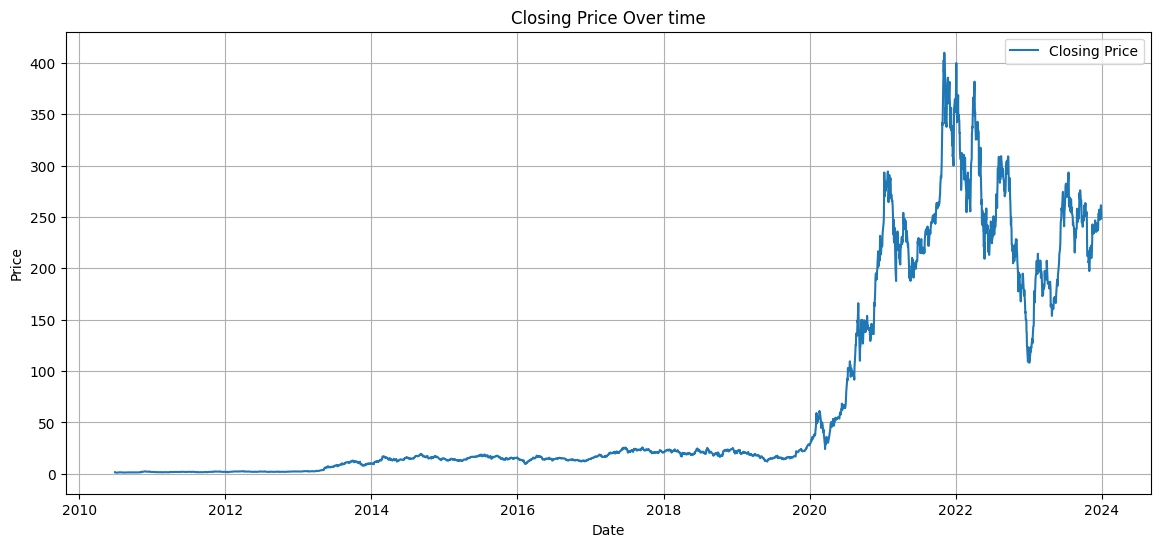

In [ ]:
# Creating a Line Graph
# Making the picture bigger
plt.figure(figsize=(14,6))

# Plot the 'Closing Price' (or whatever 'target_variable' represents) against 'Date'
# The 'label' argument is used for the legend
plt.plot(Data['Date'], Data[target_variable], label=f'{target_variable}')       
plt.title('Closing Price Over time')                    # Set the title of the plot to clearly describe its content
plt.xlabel('Date')                                      # Label the x-axis to indicate it represents the 'Date'
plt.ylabel('Price')                                     # Label the y-axis to indicate it represents the 'Price'
plt.legend()                                            # Dsplay the legend, which shows what each line on the plot represents
plt.grid(True)                                          # Adding a grid to the plot for easier reading of values
plt.savefig('closing_price_over_time.png', dpi=300, bbox_inches='tight', facecolor='lightgray')         # Saveing the plot as a PNG image with high resolution
plt.show()                                              # Show the plot


--- 
# Performing the Task 2: Data Preprocessing and Feature Engineering
---

- Handle ``missing values`` and ``outliers`` appropriately.
- Create ``time-based features`` (e.g., day of week, month, season).
- ``Analyse correlations`` between variables.
- ``Normalize`` or ``standardize`` features as necessary for Regression models.

In [47]:
# Cheking if there are any potential outliers or missing values.
Data.isnull().sum() 
# There are not any single missing value in our dataset.
# There are couple of techniques to handle missing values and outliers, I have provided a detail solution in my pdf report.

Date             0
Closing Price    0
Daily High       0
Daily Low        0
Daily Open       0
Volume           0
dtype: int64

In [48]:
# Again, lets see the data types of our dataset
print(Data.dtypes)

Date             datetime64[ns]
Closing Price           float64
Daily High              float64
Daily Low               float64
Daily Open              float64
Volume                    int64
dtype: object


In [49]:
# Feature Engineering: Extracting Time-Based Features from the 'Date' column
# This section aims to create new columns that capture different details of time
# Creating Time-Based Features:
# Extracting more information from the 'Date' Column
# Like, what year is it? What month? What day of the week?

Data['Year'] = Data['Date'].dt.year                              # Extract year from column 'Date'
Data['Month'] = Data['Date'].dt.month                            # Extracting month from column 'Date'
Data['Day'] = Data['Date'].dt.day                                # Extract day from column 'Date'
Data['DayOfWeek'] = Data['Date'].dt.dayofweek                    # Extract day of week (Monday=0, Sunday=6)
Data['DayOfYear'] = Data['Date'].dt.dayofyear                    # Extract day of year

In [50]:
print(Data[['Date', 'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear']].head())
# Successfully Created the columns

        Date  Year  Month  Day  DayOfWeek  DayOfYear
0 2010-06-29  2010      6   29          1        180
1 2010-06-30  2010      6   30          2        181
2 2010-07-01  2010      7    1          3        182
3 2010-07-02  2010      7    2          4        183
4 2010-07-06  2010      7    6          1        187


In [51]:
# Here, we can see in our Dataset the new columns
Data.head()

,Date,Closing Price,Daily High,Daily Low,Daily Open,Volume,Year,Month,Day,DayOfWeek,DayOfYear
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500,2010,6,29,1,180
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500,2010,6,30,2,181
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000,2010,7,1,3,182
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000,2010,7,2,4,183
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500,2010,7,6,1,187


In [52]:
# Analysing the correlation between variables 
# Correlation tells us how much two variables move together 
# Positive corelation means one goes up the other tends to go up
# Negative correlation means one goes up, the other tends to go down
# Near Zero means not much linear relationship

In [53]:
# Selecting only the numerical columns, --- # Date is not a numerical column
numerical_data_for_corr = Data.select_dtypes(include=np.number)
# using the heatmap 
correlation_matrix = numerical_data_for_corr.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               Closing Price  Daily High  Daily Low  Daily Open    Volume  \
Closing Price       1.000000    0.999651   0.999687    0.999222  0.105461   
Daily High          0.999651    1.000000   0.999632    0.999730  0.108045   
Daily Low           0.999687    0.999632   1.000000    0.999624  0.101291   
Daily Open          0.999222    0.999730   0.999624    1.000000  0.104520   
Volume              0.105461    0.108045   0.101291    0.104520  1.000000   
Year                0.767958    0.767837   0.767898    0.767677  0.404774   
Month               0.035983    0.034817   0.037028    0.035918 -0.086252   
Day                -0.000159   -0.000788  -0.000514   -0.001549 -0.038153   
DayOfWeek          -0.001036   -0.000964   0.000169    0.000445 -0.014195   
DayOfYear           0.035458    0.034246   0.036460    0.035273 -0.089169   

                   Year     Month       Day  DayOfWeek  DayOfYear  
Closing Price  0.767958  0.035983 -0.000159  -0.001036   0.03545

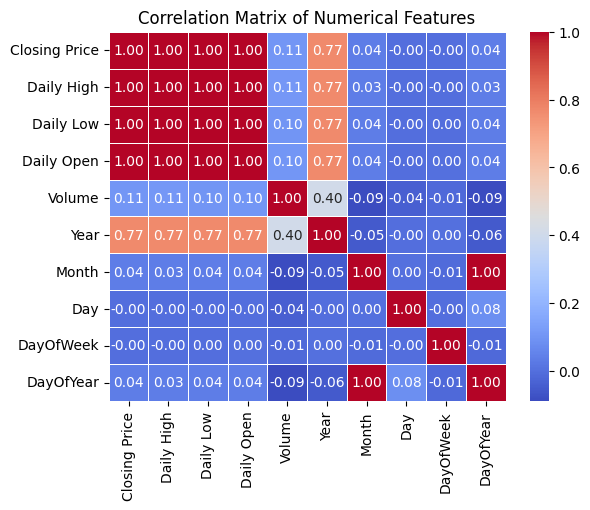

Closing Price    1.000000
Daily Low        0.999687
Daily High       0.999651
Daily Open       0.999222
Year             0.767958
Volume           0.105461
Month            0.035983
DayOfYear        0.035458
Day             -0.000159
DayOfWeek       -0.001036
Name: Closing Price, dtype: float64


In [56]:
plt.Figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# annot=True shows the numbers on the map
# cmap='coolwarm' is the color scheme
# fmt=".2f" formats the numbers to 2 decimal places
# linewidths represent width of the lines that divide each cell(square's)
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_matrix_of_numerical_features.png', dpi=300, bbox_inches='tight')
plt.show()

print(correlation_matrix[target_variable].sort_values(ascending=False))   

In [57]:
Data.head()

,Date,Closing Price,Daily High,Daily Low,Daily Open,Volume,Year,Month,Day,DayOfWeek,DayOfYear
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500,2010,6,29,1,180
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500,2010,6,30,2,181
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000,2010,7,1,3,182
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000,2010,7,2,4,183
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500,2010,7,6,1,187


# Data Normalization or Standardization

In [58]:
# So its needed for the sake of data to bring on the same scale for the machine learning model.
# if data is on the same scale machine learning models work better
# Like the Column 'Volume', 'Year' etc
# there are many types of scalers depending on the type of data. I've provide a detail description of these in my report.
# But for the numeric data, Im using the:
# MinMax Scaler: it scales data from 0 to 1
# There is this other scaler "StandardScaler" but i'm sticking with the MinMax scaler.

from sklearn.preprocessing import MinMaxScaler
# I scale the features but not the Target/Labels (what we want to guess).

features_to_use = Data.select_dtypes(include=np.number).columns.drop(target_variable)

X = Data[features_to_use]     # Features are being used for prediction
y = Data[target_variable]     # Labels to be predicted 

# Scaling the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) 

In [59]:
features_to_use                 # Our dataset Features 

Index(['Daily High', 'Daily Low', 'Daily Open', 'Volume', 'Year', 'Month',
       'Day', 'DayOfWeek', 'DayOfYear'],
      dtype='object')

In [60]:
target_variable                 # Our dataset label 

'Closing Price'

In [61]:
X_scaled                        # Successfully scaled our Features

array([[1.34982138e-03, 4.21743216e-04, 4.64595078e-04, ...,
        9.33333333e-01, 2.50000000e-01, 4.89010989e-01],
       [2.22389882e-03, 1.37066943e-03, 1.56759864e-03, ...,
        9.66666667e-01, 5.00000000e-01, 4.91758242e-01],
       [1.49818819e-03, 8.71494730e-04, 1.43926814e-03, ...,
        0.00000000e+00, 7.50000000e-01, 4.94505495e-01],
       ...,
       [6.34346728e-01, 6.33905643e-01, 6.26895143e-01, ...,
        8.66666667e-01, 5.00000000e-01, 9.86263736e-01],
       [6.38676821e-01, 6.22019399e-01, 6.39833923e-01, ...,
        9.00000000e-01, 7.50000000e-01, 9.89010989e-01],
       [6.14631609e-01, 6.08971631e-01, 6.18975924e-01, ...,
        9.33333333e-01, 1.00000000e+00, 9.91758242e-01]], shape=(3400, 9))

In [62]:
# As we can see, the result is a numpy array, lets create a dataframe of it
X_scaled = pd.DataFrame(X_scaled, columns=features_to_use, index=X.index)
X_scaled.head()

,Daily High,Daily Low,Daily Open,Volume,Year,Month,Day,DayOfWeek,DayOfYear
0,0.001350,0.000422,0.000465,0.306605,0.0,0.454545,0.933333,0.25,0.489011
1,0.002224,0.001371,0.001568,0.280640,0.0,0.454545,0.966667,0.50,0.491758
2,0.001498,0.000871,0.001439,0.133184,0.0,0.545455,0.000000,0.75,0.494505
3,0.001043,0.000614,0.001114,0.082560,0.0,0.545455,0.033333,1.00,0.497253
4,0.000543,0.000140,0.000627,0.110956,0.0,0.545455,0.166667,0.25,0.508242



---
# Performing the Task 3: Regression Model Develpoment and Evaluation
---

- Implement at least ``two`` different machine learning ``regression models`` suitable for ``time series``.
- Split the data into ``training``, ``validation`` and ``testing sets``.
- Use the appropriate ``evaluation metrics`` for ``regression tasks`` (e.g., Mean Squared Error, 
R-squared, Mean Absolute Error).
- Identify the most ``influential features`` affecting the target variable.
- Use the validation set to tune hyperparameters and evaluate the model's performance during the training process, which helps prevent overfitting, if any.
- Analyse ``model performance`` and ``interpret results`` in the context of time series regression. Make ``predictions`` on the test set.
- Provide the final evaluation results in your detailed report.

In [ ]:
# Import the tools we need for modeling from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error


# Calculate the index to split the data, taking 80% for training.
# This creates a clear boundary between the training and testing datasets.
exact_index = int(len(X_scaled) * 0.8)

# Split the 'features' (X_scaled) into training and testing sets.
# X_train will be used to teach the model, and X_test to evaluate its performance on unseen data.
X_train, X_test = X_scaled[:exact_index], X_scaled[exact_index:]

# Split the 'target variable' (y) into corresponding training and testing sets.
# y_train are the known outcomes for the training features, y_test for the testing features.
y_train, y_test = y[:exact_index], y[exact_index:]

In [64]:
print(len(X_train))
print(len(X_test))

2720
680


In [65]:
# So im going with the 2 regression model
# One is basic Simple Linear Regression
# Other is advanced Random forest regressor

# Creating the model
lr_model = LinearRegression()
# Training the model on the training data
lr_model.fit(X_train, y_train)
# Making predictions on our test data
lr_predictions = lr_model.predict(X_test) 

In [66]:
print('Intercept: ', lr_model.intercept_)

Intercept:  0.9894032755027453


In [67]:
# Evaluating the model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_predictions)

In [68]:
print("Mean Squared Error:", lr_mse)
print("Root mean squared error:", lr_rmse)
print("R-square:", lr_r2)

Mean Squared Error: 12.525007163113552
Root mean squared error: 3.539068685842866
R-square: 0.9962386928509541


# Random Forest Regressor

In [69]:
# This is a more powerful model. Imagine it as a team of many decision trees working together.
# Each tree makes a guess, and the model averages their guesses to get a final prediction.

In [70]:
# Create the model
# n_estimators is the number of trees in the forest. random_state ensures we get the same result every time.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train, y_train)
# Make predictions
rf_predictions = rf_model.predict(X_test)

In [71]:
# Evaluate the model 
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

In [72]:
print("Mean Squared Error of Random Forest:", rf_mse)
print("Root mean squared error of Random Forest:", rf_rmse)
print("R-square of Random Forest:", rf_r2)

Mean Squared Error of Random Forest: 619.8612289224097
Root mean squared error of Random Forest: 24.897012449738014
R-square of Random Forest: 0.8138533222856323


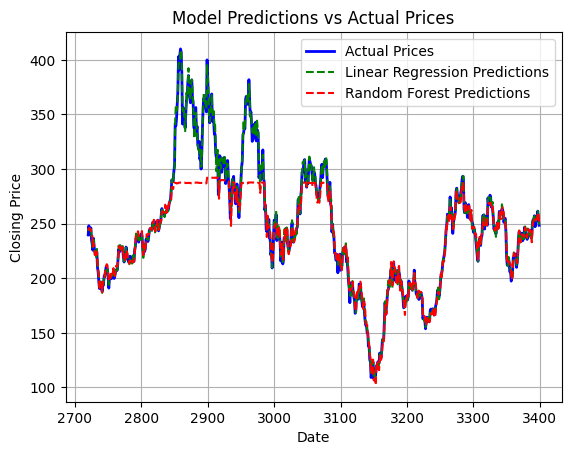

In [ ]:
# Visualize the predictions
import matplotlib.pyplot as plt
plt.Figure(figsize=(14,8))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue', linewidth=2)                                # Plot the actual prices from y_test
plt.plot(y_test.index, lr_predictions, label='Linear Regression Predictions', color='green', linestyle='--')    # Plot the Linear Regression predictions
plt.plot(y_test.index, rf_predictions, label='Random Forest Predictions', color='red', linestyle='--')          # Plot the Random Forest predictions

plt.xlabel('Date')                                          # Set the label for the x-axis
plt.ylabel('Closing Price')                                 # Set the label for the y-axis
plt.title('Model Predictions vs Actual Prices')             # Set the title of the plot
plt.legend()                                                # Displaying the legend to identify each lin
plt.grid(True)                                              # Adding a grid for more readability
plt.savefig('model_predictions_vs_actual.png', dpi=300, bbox_inches='tight')    # Saveing the plot as a PNG image with high resolution
plt.show()                                                  # Displaying the plot

In [74]:
feature_importances = pd.DataFrame({
        'feature': features_to_use,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
print("Feature Importance Ranking:")
print(feature_importances)

Feature Importance Ranking:
      feature    importance
1   Daily Low  6.471033e-01
0  Daily High  2.697429e-01
2  Daily Open  8.039290e-02
8   DayOfYear  2.054201e-03
5       Month  5.605654e-04
6         Day  6.625533e-05
3      Volume  5.034887e-05
7   DayOfWeek  2.891531e-05
4        Year  6.219783e-07


In [ ]:
# Get importances from Random Forest
rf_importances_df = pd.DataFrame({
        'feature': features_to_use,
        'importance': rf_model.feature_importances_,
        'model': 'Random Forest'                                    # Add a column to identify the model
    })
    
# Get importances from Linear Regression
# For Linear Regression, we use the absolute value of the coefficients (.coef_)
lr_importances_df = pd.DataFrame({
        'feature': features_to_use,
        'importance': np.abs(lr_model.coef_),                       # Take the absolute value for magnitude
        'model': 'Linear Regression'                                # Add a column to identify the model
    })

In [ ]:
# To compare them on the same chart, we should scale the importances for both models to be between 0 and 1.
# This is because the scales of .coef_ and .feature_importances_ are very different.
scaler_lr = MinMaxScaler()
lr_importances_df['importance'] = scaler_lr.fit_transform(lr_importances_df[['importance']])

scaler_rf = MinMaxScaler()
rf_importances_df['importance'] = scaler_rf.fit_transform(rf_importances_df[['importance']])


In [77]:
# Combine the two dataframes into one
combined_importances = pd.concat([rf_importances_df, lr_importances_df]).sort_values('importance', ascending=False)
    
print("Combined and Scaled Feature Importance Ranking:")
print(combined_importances)

Combined and Scaled Feature Importance Ranking:
      feature  importance              model
0  Daily High    1.000000  Linear Regression
1   Daily Low    1.000000      Random Forest
2  Daily Open    0.653452  Linear Regression
1   Daily Low    0.643522  Linear Regression
0  Daily High    0.416846      Random Forest
2  Daily Open    0.124234      Random Forest
8   DayOfYear    0.010501  Linear Regression
5       Month    0.009841  Linear Regression
8   DayOfYear    0.003173      Random Forest
3      Volume    0.001552  Linear Regression
5       Month    0.000865      Random Forest
6         Day    0.000733  Linear Regression
6         Day    0.000101      Random Forest
3      Volume    0.000077      Random Forest
7   DayOfWeek    0.000044      Random Forest
7   DayOfWeek    0.000042  Linear Regression
4        Year    0.000000      Random Forest
4        Year    0.000000  Linear Regression


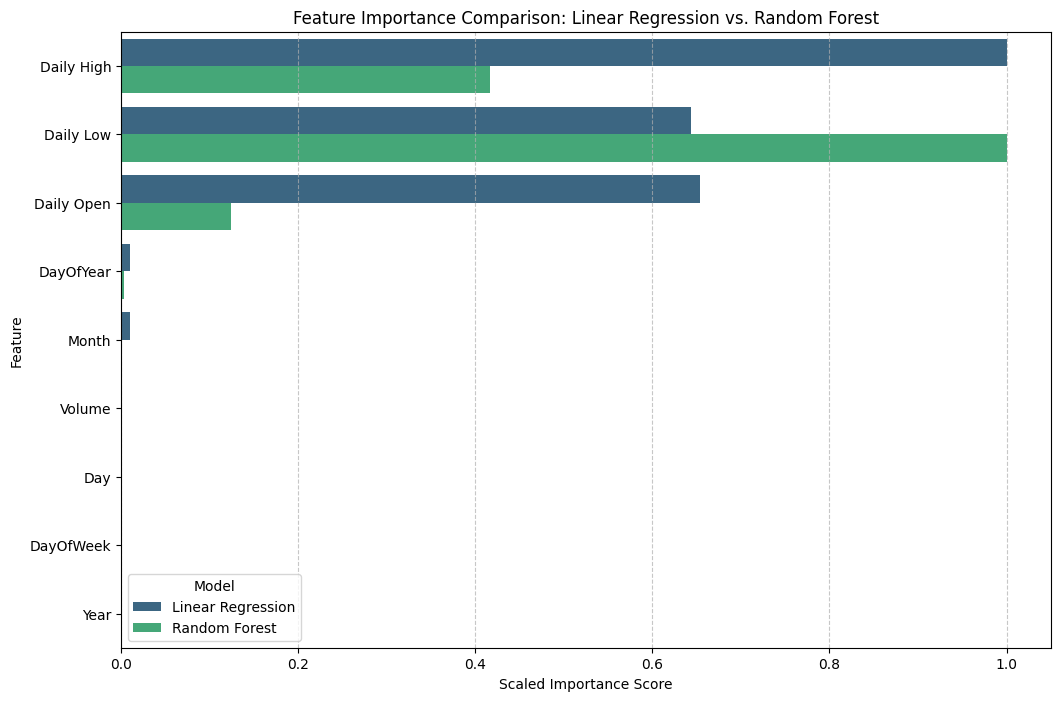

In [ ]:
# Visualize Feature Importances using HUE parameter in seaborn
# Create a bar plot using seaborn to compare feature importances
plt.figure(figsize=(12, 8))

# Create a bar plot using seaborn to compare feature importances
# x-axis: 'importance' values
# y-axis: 'feature' names
# hue: Differentiate bars by 'model' (Linear Regression vs. Random Forest)
# data: Use the 'combined_importances' DataFrame
# palette: Use the 'viridis' color scheme

sns.barplot(x='importance', y='feature', hue='model', data=combined_importances, palette='viridis')
plt.title('Feature Importance Comparison: Linear Regression vs. Random Forest')                     # Set the title of the plot
plt.xlabel('Scaled Importance Score')                                                               # Set the label for the x-axis
plt.ylabel('Feature')                                                                               # Set the label for the y-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)                                                       # Added a horizontal grid for readability purposes, with a dashed line style and transperency
plt.legend(title='Model')                                                                           # Display the legend with a title 'Model' to identify the different models
plt.savefig('feature_importance_comparison.png', dpi=300, bbox_inches='tight')                      # Save the plot as a PNG image with high resolution and tight bounding box
plt.show()                                                                                          # Showing the plot